In [1]:
import pandas as pd

In [2]:
df =pd.read_csv("dataset.csv")

In [3]:
df.head()

,namecompany,description,rating,activity,date_publish,text_article
0,Timeweb Cloud,Облачная платформа для разработчиков и бизнеса,1572.77,"Веб-разработка, Домены и хостинг, Веб-сервисы",2023-03-27,В своём блоге я рассмотрел устройство и назнач...
1,OTUS,Цифровые навыки от ведущих экспертов,795.43,"Консалтинг и поддержка, Рекрутинг и HR, Произв...",2023-03-27,Автор статьи: Роман КозловРуководитель курса B...
2,Онлайн Патент,Ваш личный патентный офис,220.74,"Консалтинг и поддержка, Веб-сервисы",2023-03-27,Рынок биологически активных добавок(БАД) с каж...
3,OTUS,Цифровые навыки от ведущих экспертов,795.43,"Консалтинг и поддержка, Рекрутинг и HR, Произв...",2023-03-27,Автор статьи: Александр КолесниковВирусный ана...
4,VK,"Технологии, которые объединяют",568.63,"Мобильные технологии, Веб-сервисы, Игры и разв...",2023-03-27,"Всем привет! Меня зовут Артём Пузанков, я DevS..."


In [4]:
df.shape

(438, 6)

In [5]:
df = df.drop(["Unnamed: 0"], axis=1)

In [6]:
df

,namecompany,description,rating,activity,date_publish,text_article
0,Timeweb Cloud,Облачная платформа для разработчиков и бизнеса,1572.77,"Веб-разработка, Домены и хостинг, Веб-сервисы",2023-03-27,В своём блоге я рассмотрел устройство и назнач...
1,OTUS,Цифровые навыки от ведущих экспертов,795.43,"Консалтинг и поддержка, Рекрутинг и HR, Произв...",2023-03-27,Автор статьи: Роман КозловРуководитель курса B...
2,Онлайн Патент,Ваш личный патентный офис,220.74,"Консалтинг и поддержка, Веб-сервисы",2023-03-27,Рынок биологически активных добавок(БАД) с каж...
3,OTUS,Цифровые навыки от ведущих экспертов,795.43,"Консалтинг и поддержка, Рекрутинг и HR, Произв...",2023-03-27,Автор статьи: Александр КолесниковВирусный ана...
4,VK,"Технологии, которые объединяют",568.63,"Мобильные технологии, Веб-сервисы, Игры и разв...",2023-03-27,"Всем привет! Меня зовут Артём Пузанков, я DevS..."
...,...,...,...,...,...,...
433,ua-hosting.company,Хостинг-провайдер: серверы в NL до 300 Гбит/с,215.86,"Аппаратное обеспечение, Связь и телекоммуникац...",2023-03-10,Нам всегда есть чему поучиться у природы. Мног...
434,Флант,"DevOps-as-a-Service, Kubernetes, обслуживание ...",240.40,"Программное обеспечение, Консалтинг и поддержк...",2023-03-10,Разработка приложений иногда достигает такого ...
435,Nixys,"DevOps, DevSecOps, MLOps — системный IT-интегр...",115.77,"Консалтинг и поддержка, Оптимизация, Веб-сервисы",2023-03-10,"Всем привет! Меня зовут Виктор, я DevOps‑инжен..."
436,2ГИС,Главные по городской навигации,110.62,"Программное обеспечение, Реклама и маркетинг, ...",2023-03-10,Наша команда работает над «лицом» 2gis.ru — We...


### Предварительная обработка данных

1. Перевод всех букв в тексте в нижний регистр

2. Удалить пунктуацию

3. Токенизация по словам

4. Удаление стоп слов

In [5]:
import string

In [6]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
def remove_punctuation(text):
    return ''.join([ch for ch in text if ch not in string.punctuation])

In [10]:
df['text_article'][0]

'В своём блоге я рассмотрел устройство и назначение почти всех контроллеров Norvi, обойдены вниманием оказались только контроллеры линейки GSM, имеющие соответствующие модули на своём борту.Как вы понимаете, наличие GSM модуля является существенным дополнением и значительно расширяет возможности контроллера: можно посылать и принимать информационные и управляющие SMS, можно организовать резервный, независимый от вашей IoT инфраструктуры канал связи и т.\xa0д.В этой статье я рассмотрю модель NORVI GSM AE02-V, которая кроме ESP32 и GSM модуля содержит цифровые и аналоговые входы, интерфейс RS485 и прочие возможности, что делает этот контроллер интересным решением для создания ваших проектов по автоматизации.❯Семейство NORVI GSMКонтроллеры линейки NORVI GSM имеют в качестве ядра модуль ESP32-WROOM-32 (Wi-Fi, Bluetooth, 4 МБ EEPROM и т. д.), что позволяет решать довольно тяжёлые вычислительные задачи, поддерживать беспроводную связь и полноценный веб-интерфейс, работать с шифрованием данны

In [11]:
t = remove_punctuation(df['text_article'][0].lower())

In [12]:
t

'в своём блоге я рассмотрел устройство и назначение почти всех контроллеров norvi обойдены вниманием оказались только контроллеры линейки gsm имеющие соответствующие модули на своём бортукак вы понимаете наличие gsm модуля является существенным дополнением и значительно расширяет возможности контроллера можно посылать и принимать информационные и управляющие sms можно организовать резервный независимый от вашей iot инфраструктуры канал связи и т\xa0дв этой статье я рассмотрю модель norvi gsm ae02v которая кроме esp32 и gsm модуля содержит цифровые и аналоговые входы интерфейс rs485 и прочие возможности что делает этот контроллер интересным решением для создания ваших проектов по автоматизации❯семейство norvi gsmконтроллеры линейки norvi gsm имеют в качестве ядра модуль esp32wroom32 wifi bluetooth 4 мб eeprom и т д что позволяет решать довольно тяжёлые вычислительные задачи поддерживать беспроводную связь и полноценный вебинтерфейс работать с шифрованием данных и т\xa0дбольшинство модел

In [13]:
def remove_numbers(text):
    return ''.join([i if not i.isdigit() else '' for i in text])

In [14]:
t = remove_numbers(t)

In [15]:
def remove_notalpha(text):
    return ''.join([i if i.isalpha() else ' ' for i in text])

In [16]:
t = remove_notalpha(t)

In [24]:
import re
def remove_space(text):
    return re.sub(r'\s+',' ', text, flags=re.I)

In [26]:
t = remove_space(t)

In [19]:
def remove_latin(text):
    return re.sub('[a-z]','', text, flags=re.I)

In [20]:
t = remove_latin(t)

In [21]:
st = '❯\xa0'
def remove_othersymbol(text):
    return ''.join([ch if ch not in st else ' ' for ch in text])

In [22]:
t = remove_othersymbol(t)

In [27]:
t

'в своём блоге я рассмотрел устройство и назначение почти всех контроллеров обойдены вниманием оказались только контроллеры линейки имеющие соответствующие модули на своём бортукак вы понимаете наличие модуля является существенным дополнением и значительно расширяет возможности контроллера можно посылать и принимать информационные и управляющие можно организовать резервный независимый от вашей инфраструктуры канал связи и т дв этой статье я рассмотрю модель которая кроме и модуля содержит цифровые и аналоговые входы интерфейс и прочие возможности что делает этот контроллер интересным решением для создания ваших проектов по автоматизации семейство контроллеры линейки имеют в качестве ядра модуль мб и т д что позволяет решать довольно тяжёлые вычислительные задачи поддерживать беспроводную связь и полноценный вебинтерфейс работать с шифрованием данных и т дбольшинство моделей контроллеров этой линейки имеют модуль дисплей кнопки управления на передней панели корпуса межблочный интерфейс 

In [31]:
import nltk
from nltk.corpus import stopwords

In [32]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\МОиБД\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
stopword = stopwords.words("english")

In [34]:
stopword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:

stopword = nltk.corpus.stopwords.words('russian')

In [36]:
stopword

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [37]:
def remove_stopwords(text):
    return [word for word in text if word not in stopword]

In [38]:
from nltk.tokenize import word_tokenize

In [39]:
def tokenize(text):
    t = word_tokenize(text)
    return [token for token in t if token not in stopword]

In [23]:
nltk.download('word_tokenize')

[nltk_data] Error loading word_tokenize: Package 'word_tokenize' not
[nltk_data]     found in index


False

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rezed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [40]:
word_tokenize(t)

['в',
 'своём',
 'блоге',
 'я',
 'рассмотрел',
 'устройство',
 'и',
 'назначение',
 'почти',
 'всех',
 'контроллеров',
 'обойдены',
 'вниманием',
 'оказались',
 'только',
 'контроллеры',
 'линейки',
 'имеющие',
 'соответствующие',
 'модули',
 'на',
 'своём',
 'бортукак',
 'вы',
 'понимаете',
 'наличие',
 'модуля',
 'является',
 'существенным',
 'дополнением',
 'и',
 'значительно',
 'расширяет',
 'возможности',
 'контроллера',
 'можно',
 'посылать',
 'и',
 'принимать',
 'информационные',
 'и',
 'управляющие',
 'можно',
 'организовать',
 'резервный',
 'независимый',
 'от',
 'вашей',
 'инфраструктуры',
 'канал',
 'связи',
 'и',
 'т',
 'дв',
 'этой',
 'статье',
 'я',
 'рассмотрю',
 'модель',
 'которая',
 'кроме',
 'и',
 'модуля',
 'содержит',
 'цифровые',
 'и',
 'аналоговые',
 'входы',
 'интерфейс',
 'и',
 'прочие',
 'возможности',
 'что',
 'делает',
 'этот',
 'контроллер',
 'интересным',
 'решением',
 'для',
 'создания',
 'ваших',
 'проектов',
 'по',
 'автоматизации',
 'семейство',
 'конт

In [41]:
t = tokenize(t)

In [42]:
t

['своём',
 'блоге',
 'рассмотрел',
 'устройство',
 'назначение',
 'контроллеров',
 'обойдены',
 'вниманием',
 'оказались',
 'контроллеры',
 'линейки',
 'имеющие',
 'соответствующие',
 'модули',
 'своём',
 'бортукак',
 'понимаете',
 'наличие',
 'модуля',
 'является',
 'существенным',
 'дополнением',
 'значительно',
 'расширяет',
 'возможности',
 'контроллера',
 'посылать',
 'принимать',
 'информационные',
 'управляющие',
 'организовать',
 'резервный',
 'независимый',
 'вашей',
 'инфраструктуры',
 'канал',
 'связи',
 'т',
 'дв',
 'статье',
 'рассмотрю',
 'модель',
 'которая',
 'кроме',
 'модуля',
 'содержит',
 'цифровые',
 'аналоговые',
 'входы',
 'интерфейс',
 'прочие',
 'возможности',
 'делает',
 'контроллер',
 'интересным',
 'решением',
 'создания',
 'ваших',
 'проектов',
 'автоматизации',
 'семейство',
 'контроллеры',
 'линейки',
 'имеют',
 'качестве',
 'ядра',
 'модуль',
 'мб',
 'т',
 'д',
 'позволяет',
 'решать',
 'довольно',
 'тяжёлые',
 'вычислительные',
 'задачи',
 'поддерживать

In [43]:
len(t)

887

In [109]:
!pip install pymorphy2

  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13724 sha256=93d6998c61d6bdb38adfa1f68a4ff2c78cd5bef8b001f4b669e5c62ab43af05c
  Stored in directory: c:\users\rezed\appdata\local\pip\cache\wheels\70\4a\46\1309fc853b8d395e60bafaf1b6df7845bdd82c95fd59dd8d2b
Successfully built docopt


5. Стемминг

In [44]:
from nltk.stem import PorterStemmer

In [45]:
ps = PorterStemmer()
def stemming(text):
    tokenized_text = [ps.stem(word) for word in text]
    return tokenized_text

In [46]:
t1 = stemming(t)

In [47]:
t1

['своём',
 'блоге',
 'рассмотрел',
 'устройство',
 'назначение',
 'контроллеров',
 'обойдены',
 'вниманием',
 'оказались',
 'контроллеры',
 'линейки',
 'имеющие',
 'соответствующие',
 'модули',
 'своём',
 'бортукак',
 'понимаете',
 'наличие',
 'модуля',
 'является',
 'существенным',
 'дополнением',
 'значительно',
 'расширяет',
 'возможности',
 'контроллера',
 'посылать',
 'принимать',
 'информационные',
 'управляющие',
 'организовать',
 'резервный',
 'независимый',
 'вашей',
 'инфраструктуры',
 'канал',
 'связи',
 'т',
 'дв',
 'статье',
 'рассмотрю',
 'модель',
 'которая',
 'кроме',
 'модуля',
 'содержит',
 'цифровые',
 'аналоговые',
 'входы',
 'интерфейс',
 'прочие',
 'возможности',
 'делает',
 'контроллер',
 'интересным',
 'решением',
 'создания',
 'ваших',
 'проектов',
 'автоматизации',
 'семейство',
 'контроллеры',
 'линейки',
 'имеют',
 'качестве',
 'ядра',
 'модуль',
 'мб',
 'т',
 'д',
 'позволяет',
 'решать',
 'довольно',
 'тяжёлые',
 'вычислительные',
 'задачи',
 'поддерживать

In [48]:
from nltk.stem import LancasterStemmer
lancaster = LancasterStemmer()
def stemming2(text):
    tokenized_text = [lancaster.stem(word) for word in text]
    return tokenized_text

In [49]:
t3 = stemming2(t)

In [50]:
t3

['своём',
 'блоге',
 'рассмотрел',
 'устройство',
 'назначение',
 'контроллеров',
 'обойдены',
 'вниманием',
 'оказались',
 'контроллеры',
 'линейки',
 'имеющие',
 'соответствующие',
 'модули',
 'своём',
 'бортукак',
 'понимаете',
 'наличие',
 'модуля',
 'является',
 'существенным',
 'дополнением',
 'значительно',
 'расширяет',
 'возможности',
 'контроллера',
 'посылать',
 'принимать',
 'информационные',
 'управляющие',
 'организовать',
 'резервный',
 'независимый',
 'вашей',
 'инфраструктуры',
 'канал',
 'связи',
 'т',
 'дв',
 'статье',
 'рассмотрю',
 'модель',
 'которая',
 'кроме',
 'модуля',
 'содержит',
 'цифровые',
 'аналоговые',
 'входы',
 'интерфейс',
 'прочие',
 'возможности',
 'делает',
 'контроллер',
 'интересным',
 'решением',
 'создания',
 'ваших',
 'проектов',
 'автоматизации',
 'семейство',
 'контроллеры',
 'линейки',
 'имеют',
 'качестве',
 'ядра',
 'модуль',
 'мб',
 'т',
 'д',
 'позволяет',
 'решать',
 'довольно',
 'тяжёлые',
 'вычислительные',
 'задачи',
 'поддерживать

6. Лемматизация

In [51]:
from nltk.stem import WordNetLemmatizer

In [52]:
wn = nltk.WordNetLemmatizer()
def lemmatizing(text):
    tokenized_text = [wn.lemmatize(word) for word in text]
    return tokenized_text

In [54]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\МОиБД\AppData\Roaming\nltk_data...


True

In [55]:
t2 = lemmatizing(t)

In [56]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\МОиБД\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [58]:
t2

['своём',
 'блоге',
 'рассмотрел',
 'устройство',
 'назначение',
 'контроллеров',
 'обойдены',
 'вниманием',
 'оказались',
 'контроллеры',
 'линейки',
 'имеющие',
 'соответствующие',
 'модули',
 'своём',
 'бортукак',
 'понимаете',
 'наличие',
 'модуля',
 'является',
 'существенным',
 'дополнением',
 'значительно',
 'расширяет',
 'возможности',
 'контроллера',
 'посылать',
 'принимать',
 'информационные',
 'управляющие',
 'организовать',
 'резервный',
 'независимый',
 'вашей',
 'инфраструктуры',
 'канал',
 'связи',
 'т',
 'дв',
 'статье',
 'рассмотрю',
 'модель',
 'которая',
 'кроме',
 'модуля',
 'содержит',
 'цифровые',
 'аналоговые',
 'входы',
 'интерфейс',
 'прочие',
 'возможности',
 'делает',
 'контроллер',
 'интересным',
 'решением',
 'создания',
 'ваших',
 'проектов',
 'автоматизации',
 'семейство',
 'контроллеры',
 'линейки',
 'имеют',
 'качестве',
 'ядра',
 'модуль',
 'мб',
 'т',
 'д',
 'позволяет',
 'решать',
 'довольно',
 'тяжёлые',
 'вычислительные',
 'задачи',
 'поддерживать

In [59]:
import pymorphy2

In [60]:
morph = pymorphy2.MorphAnalyzer()

In [61]:
def lemmatize(text):
    res = list()
    for word in text:
        p = morph.parse(word)[0]
        res.append(p.normal_form)

    return res

In [63]:
t4 = lemmatize(t)

In [64]:
t4

['свой',
 'блог',
 'рассмотреть',
 'устройство',
 'назначение',
 'контроллер',
 'обойти',
 'внимание',
 'оказаться',
 'контроллер',
 'линейка',
 'иметь',
 'соответствующий',
 'модуль',
 'свой',
 'бортукак',
 'понимать',
 'наличие',
 'модуль',
 'являться',
 'существенный',
 'дополнение',
 'значительно',
 'расширять',
 'возможность',
 'контроллер',
 'посылать',
 'принимать',
 'информационный',
 'управлять',
 'организовать',
 'резервный',
 'независимый',
 'ваш',
 'инфраструктура',
 'канал',
 'связь',
 'так',
 'дв',
 'статья',
 'рассмотреть',
 'модель',
 'который',
 'кроме',
 'модуль',
 'содержать',
 'цифровой',
 'аналоговый',
 'вход',
 'интерфейс',
 'прочий',
 'возможность',
 'делать',
 'контроллер',
 'интересный',
 'решение',
 'создание',
 'ваш',
 'проект',
 'автоматизация',
 'семейство',
 'контроллер',
 'линейка',
 'иметь',
 'качество',
 'ядро',
 'модуль',
 'мб',
 'так',
 'далее',
 'позволять',
 'решать',
 'довольно',
 'тяжёлый',
 'вычислительный',
 'задача',
 'поддерживать',
 'беспрово

In [65]:
import string
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [67]:
def remove_punctuation(text):
    return ''.join([ch for ch in text if ch not in string.punctuation])

def remove_notalpha(text):
    return ''.join([i if i.isalpha() else ' ' for i in text])

def remove_space(text):
    return re.sub(r'\s+',' ', text, flags=re.I)

def remove_latin(text):
    return re.sub('[a-z]','', text, flags=re.I)

def tokenize(text):
    t = word_tokenize(text)
    return [token for token in t if token not in stopword]

In [68]:
df.head()

,namecompany,description,rating,activity,date_publish,text_article
0,Timeweb Cloud,Облачная платформа для разработчиков и бизнеса,1572.77,"Веб-разработка, Домены и хостинг, Веб-сервисы",2023-03-27,В своём блоге я рассмотрел устройство и назнач...
1,OTUS,Цифровые навыки от ведущих экспертов,795.43,"Консалтинг и поддержка, Рекрутинг и HR, Произв...",2023-03-27,Автор статьи: Роман КозловРуководитель курса B...
2,Онлайн Патент,Ваш личный патентный офис,220.74,"Консалтинг и поддержка, Веб-сервисы",2023-03-27,Рынок биологически активных добавок(БАД) с каж...
3,OTUS,Цифровые навыки от ведущих экспертов,795.43,"Консалтинг и поддержка, Рекрутинг и HR, Произв...",2023-03-27,Автор статьи: Александр КолесниковВирусный ана...
4,VK,"Технологии, которые объединяют",568.63,"Мобильные технологии, Веб-сервисы, Игры и разв...",2023-03-27,"Всем привет! Меня зовут Артём Пузанков, я DevS..."


In [69]:
prep_text = [tokenize(remove_space(remove_latin(remove_notalpha(remove_punctuation(text.lower()))))) for text in df['text_article'] ]

In [70]:
df['prep_text'] = prep_text

In [71]:
prep_text2 = [lemmatize(tokenize(remove_space(remove_latin(remove_notalpha(remove_punctuation(text.lower())))))) for text in df['text_article'] ]

In [72]:
df['prep_text2'] = prep_text2

In [73]:
df.head()

,namecompany,description,rating,activity,date_publish,text_article,prep_text,prep_text2
0,Timeweb Cloud,Облачная платформа для разработчиков и бизнеса,1572.77,"Веб-разработка, Домены и хостинг, Веб-сервисы",2023-03-27,В своём блоге я рассмотрел устройство и назнач...,"[своём, блоге, рассмотрел, устройство, назначе...","[свой, блог, рассмотреть, устройство, назначен..."
1,OTUS,Цифровые навыки от ведущих экспертов,795.43,"Консалтинг и поддержка, Рекрутинг и HR, Произв...",2023-03-27,Автор статьи: Роман КозловРуководитель курса B...,"[автор, статьи, роман, козловруководитель, кур...","[автор, статья, роман, козловруководитель, кур..."
2,Онлайн Патент,Ваш личный патентный офис,220.74,"Консалтинг и поддержка, Веб-сервисы",2023-03-27,Рынок биологически активных добавок(БАД) с каж...,"[рынок, биологически, активных, добавокбад, ка...","[рынок, биологически, активный, добавокбад, ка..."
3,OTUS,Цифровые навыки от ведущих экспертов,795.43,"Консалтинг и поддержка, Рекрутинг и HR, Произв...",2023-03-27,Автор статьи: Александр КолесниковВирусный ана...,"[автор, статьи, александр, колесниковвирусный,...","[автор, статья, александр, колесниковвирусный,..."
4,VK,"Технологии, которые объединяют",568.63,"Мобильные технологии, Веб-сервисы, Игры и разв...",2023-03-27,"Всем привет! Меня зовут Артём Пузанков, я DevS...","[всем, привет, зовут, артём, пузанков, инженер...","[весь, привет, звать, артём, пузанок, инженер,..."


Векторизация текста или преобразование текста в численную форму. Алгоритмы машинного обучения не умеют работать с текстом, поэтому необходимо превратить текст в цифры.

1. Прямое кодирование

Прямое кодирование (one-hot encoding) считается самым простым способом преобразования токенов в тензоры и выполняется следующим образом:

1. каждый токен представляет бинарный вектор (значения 0 или 1);
2. единица ставится тому элементу, который соответствует номеру токена в словаре.

Проблемой прямого кодирования является размерность. 

2. Bag of words

В отличие от прямого кодирования, мешок слов (Bag of words) выделяет вектору весь документ, и каждый элемент кодируется 1 по порядку следования слов в словаре:

Bag of words решает проблему размерности по одной оси. Количество строк определяется количеством документов. Однако, этот метод не учитывает важность того или иного токена, ведь одно слово может повторятся по несколько раз. 

3. TF-IDF

TF-IDF состоит из двух компонентов: Term Frequency (частотность слова в документе) и Inverse Document Frequency (инверсия частоты документа). Они считаются следующим образом:

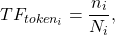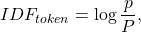

где n_i — сколько раз встречается токен в i-ом документе,  
N_i — общее количество токенов в i-ом документе,   
p — количество документов, в которых встречается токен,   
P — общее количеств документов.   
В конечном счете, TF-IDF – это произведение TF на IDF

 В TF-IDF редкие слова и слова, которые встречаются во всех документах, несут мало информации. 

4. Word Embeddings